# SAMPLING DISTRIBUTIONS

Using a dataset downloaded from Kaggle where we can find data from people with diabetes I will practice checking if the sample that I'm going to choose will be representative of the whole population.

In [23]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [49]:
#Load Dataset

diabetes = pd.read_csv("diabetes.csv")

In [57]:
# Take a look at the dataset

print(diabetes.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [56]:
# Check the size of the dataset

print(len(diabetes))

768


In [26]:
# Helper functions to calculate Sampling Distributions

def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

In [52]:
# Create a Variable that will be our population, we will focus on the variable "Blood Pressure"

population = diabetes['BloodPressure']
print(population[0:20])

0     72
1     66
2     64
3     66
4     40
5     74
6     50
7      0
8     70
9     96
10    92
11    74
12    80
13    60
14    72
15     0
16    84
17    74
18    30
19    70
Name: BloodPressure, dtype: int64


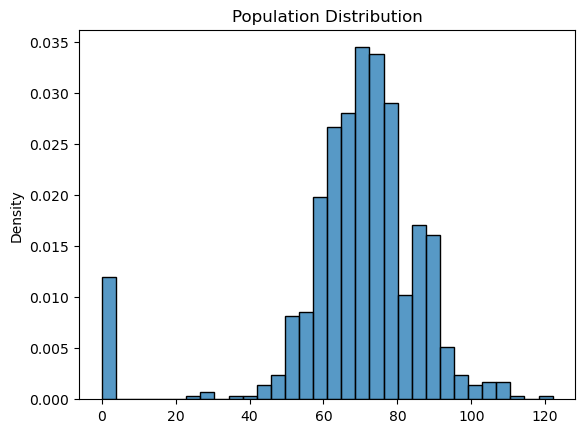

None


<Figure size 640x480 with 0 Axes>

In [53]:
# Plot our Population

print(population_distribution(population))

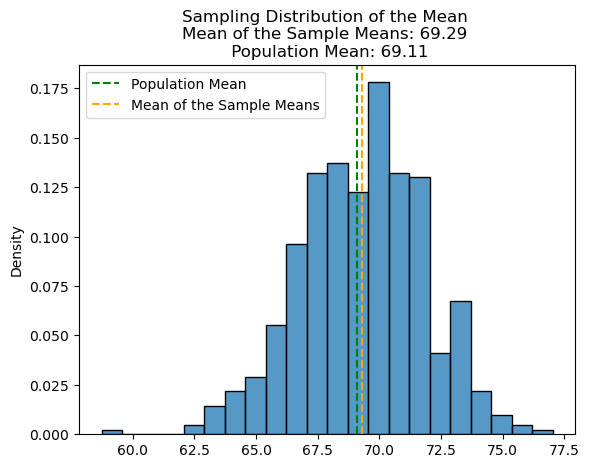

None


<Figure size 640x480 with 0 Axes>

In [58]:
# Sampling Distribution giving a sample mean of 50 people

print(sampling_distribution(population, 50, "Mean"))

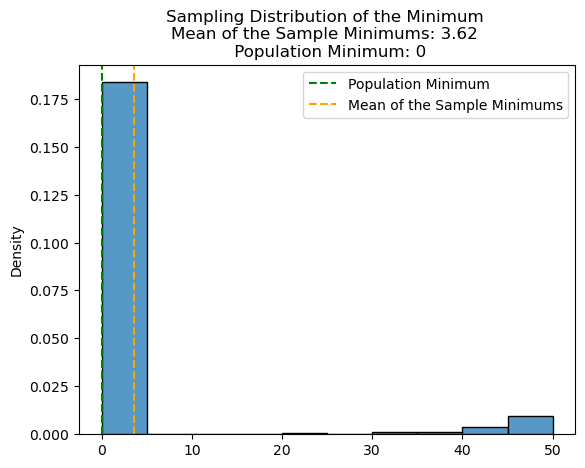

None


<Figure size 640x480 with 0 Axes>

In [59]:
# Sampling Distribution giving a sample minimum of 50 people 

print(sampling_distribution(population, 50, "Minimum"))

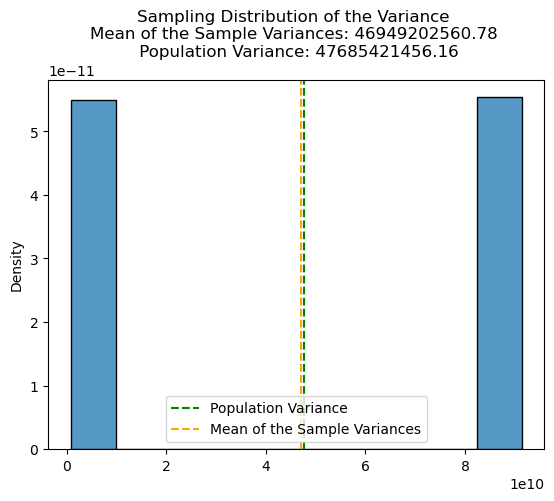

None


<Figure size 640x480 with 0 Axes>

In [31]:
# Sampling Distribution giving a sample variance of 25 companies 

print(sampling_distribution(population, 25, "Variance"))

In [60]:
# Find our Population Mean and Standard Deviation

population_mean = np.mean(population)
population_std = np.std(population)
print(round(population_mean, 2), round(population_std,2))

69.11 19.34


In [61]:
# Calculate the Standard Error

standard_error = population_std / (25**.5)
print(standard_error)

3.8686403257963393


In [63]:
# Using the Cumulative Density Function I will calculate the probability of the sample mean being less than 65 blood pressure

print(stats.norm.cdf(65, population_mean, standard_error))

0.14429553789659583


In [64]:
# Using the Cumulative Density Function I will calculate the probability of the sample mean being greater than 67 blood pressure
print(1 - stats.norm.cdf(67, population_mean, standard_error))

0.7068618298672735
